# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The uesr car dealership is looking to analuyze the factors that impact the perice of a used car and find the ones that make the most impact. As a result, the used car dealer can focus on those factors and perhaps increase the price of the used car in its dealership and increasse profit margin. On the other hand, if it finds other used cars that are over proiced, it can decide to not buy those cars. So it helps the dealer to make more money from the cars (lower buying and/or higher selling cost)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import set_config
warnings.filterwarnings('ignore')
data_df = pd.read_csv('data/vehicles.csv')

In [2]:
data_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
data_df.shape

(426880, 18)

Select the columns that are most likely to be impactful to the car price. From the list below there are only a few columns that have lesser number of N/A iitems.

In [4]:

data_df.isna().sum()




id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [5]:
#Here is a subset of columns we will use for the remainder of the project.


data_subset=data_df[["region", "price", "year", "model", "odometer","title_status", "transmission","state"]]
data_subset.reset_index(inplace=True, drop=True)

In [6]:
data_subset.dtypes

region           object
price             int64
year            float64
model            object
odometer        float64
title_status     object
transmission     object
state            object
dtype: object

Next cell removes all the columns except odometer and year. 

In [7]:
	
data_subset.isna().sum()
data_subset.dropna(inplace=True)
data_subset.reset_index(inplace=True, drop=True)
# YOUR CODE HERE
num_title=data_subset["title_status"].unique()
num_trans=data_subset["transmission"].unique()
num_states=data_subset["state"].unique()
# Answer check
print(num_title.size)
print(num_trans)
print(num_states.size)

title_encoded = pd.get_dummies(data_subset['title_status'])
trans_encoded=pd.get_dummies(data_subset["transmission"])
data_subset=data_subset.drop(["title_status", "transmission","state", "region", "model"], inplace=False, axis=1)

6
['other' 'automatic' 'manual']
51


In [8]:
#We also used the title and transmission fields but the mse was  the same as what we got with the odometer/year parameters. So have commented out for now

# data_combined = pd.concat([title_encoded, trans_encoded], axis=1)
# X_train, X_test, y_train, y_test =train_test_split(data_combined,data_subset["price"],test_size=0.3, random_state = 22)

# #data_combined=data_subset.drop(["title_status", "transmission","state", "region", "model", "price"], inplace=False, axis=1)
# f_with_data_combined = linear_model.LinearRegression(fit_intercept=False)
# ccc_linreg=f_with_data_combined.fit(X_train, y_train)
# train_mse=mean_squared_error(f_with_data_combined.predict(X_train), y_train)
# train_mse
# predict=f_with_data_combined.predict(X_test)
# predict_mse=mean_squared_error(predict, y_test)
# print(f"predict_mse={predict_mse}, train_mse={train_mse}")
# data_combined.head()
# ccc_linreg.coef_

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
data_subset.head()

,price,year,odometer
0,33590,2014.0,57923.0
1,22590,2010.0,71229.0
2,39590,2020.0,19160.0
3,30990,2017.0,41124.0
4,15000,2013.0,128000.0


Next step is removing outliers from the table but removing number that are > 2 * sigma

In [10]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(data_subset, z_thresh=2)

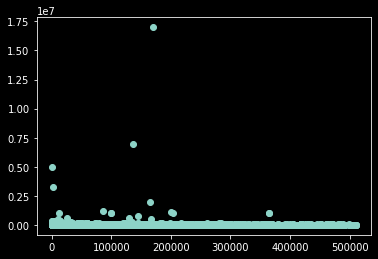

In [11]:

#Set up the training and test data sets

X = data_subset.drop(['price'], axis = 1)
y = data_subset['price']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state = 22)
plt.scatter(X_train["odometer"], y_train)

In [12]:
X.head()


,year,odometer
0,2014.0,57923.0
1,2010.0,71229.0
2,2020.0,19160.0
3,2017.0,41124.0
4,2013.0,128000.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Set up two pipelines. One is for linear regression and other is for Lasso regression. Degree of 1 was used since multiple degrees didnt make a difference in mse

In [13]:
auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('linear', LinearRegression())])
auto_pipe1 = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state=42))])

Linear model

In [14]:
auto_pipe.fit(X_train, y_train)
linear_coefs = auto_pipe.named_steps['linear'].coef_
# Answer check
print(type(linear_coefs))
print(linear_coefs)
auto_pipe

<class 'numpy.ndarray'>
[-1431836.88988671  -226208.9607747   1436353.61769201   218750.49040841
     4765.64492244]


Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

Lasso model

In [15]:
auto_pipe1.fit(X_train, y_train)
lasso_coefs = auto_pipe1.named_steps['lasso'].coef_
# Answer check
print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe1

<class 'numpy.ndarray'>
[ 4799.46052403 -7696.6329966   -124.63477311 -1536.76132528
  6125.62846005]


Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

Linear model MSE

In [16]:
train_predict=auto_pipe.predict(X_train)
train_predict[train_predict < 0] = 0
train_mse=mean_squared_error(train_predict, y_train)

test_predict=auto_pipe.predict(X_test)
test_predict[test_predict < 0] = 0
test_mse=mean_squared_error(test_predict, y_test)

print(f"Linear Model: train_mse={train_mse}, test_mse={test_mse}")

Linear Model: train_mse=1572113778.8362997, test_mse=1061399840.143104


Lasso Model MSE

In [17]:
train_predict=auto_pipe1.predict(X_train)
train_predict[train_predict < 0] = 0
train_mse=mean_squared_error(train_predict, y_train)

test_predict=auto_pipe1.predict(X_test)
test_predict[test_predict < 0] = 0
test_mse=mean_squared_error(test_predict, y_test)

print(f"Lasso Model: train_mse={train_mse}, test_mse={test_mse}")

Lasso Model: train_mse=1575714979.230497, test_mse=1065213896.2255602


Test vector prediction vs actual price

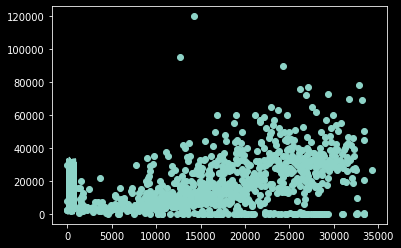

In [18]:
plt.plot(test_predict[0:1000])
plt.scatter(test_predict[0:1000], y_test[0:1000])

In [19]:
test_predict[0:9]

array([23774.86867441, 28835.43444052, 10503.80094664, 19759.06093956,
       30997.4625406 , 29050.142217  , 25611.3151701 ,  5419.8062587 ,
       22169.76660211])

In [20]:
y_test[0:9]

68961     51999
309550    31590
29035     10995
218608    24278
172099    19990
54812     28995
246409        0
148866    11500
42087      6900
Name: price, dtype: int64

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [21]:
#It seems that the mse is not different whether we use the polynomial linear regression on year/odometer  or we use the transmission / title status. 

Will try to use the manufacturer in the equation. Let us focus on Toyota and redo the strps above. Here is the frame with Toyota

In [22]:
#Focussed on a particular manufacturer
data_df=data_df.loc[data_df['manufacturer'] == "toyota"]  

In [23]:
data_subset=data_df[["region", "price", "year", "model", "odometer","title_status", "transmission","state"]]
data_subset.reset_index(inplace=True, drop=True)
	
data_subset.isna().sum()
data_subset.dropna(inplace=True)
data_subset.reset_index(inplace=True, drop=True)
# YOUR CODE HERE
num_title=data_subset["title_status"].unique()
num_trans=data_subset["transmission"].unique()
num_states=data_subset["state"].unique()
# Answer check
print(num_title.size)
print(num_trans)
print(num_states.size)

title_encoded = pd.get_dummies(data_subset['title_status'])
trans_encoded=pd.get_dummies(data_subset["transmission"])
data_subset=data_subset.drop(["title_status", "transmission","state", "region", "model"], inplace=False, axis=1)
drop_numerical_outliers(data_subset, z_thresh=2)
X = data_subset.drop(['price', "odometer"], axis = 1)
y = data_subset['price']
X.head()

6
['other' 'automatic' 'manual']
51


,year
0,2017.0
1,2019.0
2,2014.0
3,2014.0
4,2016.0


<class 'numpy.ndarray'>
[-1370225.03406808  1377503.69861275]
Linear Model: train_mse=108799778.65571931, test_mse=106974859.64997852


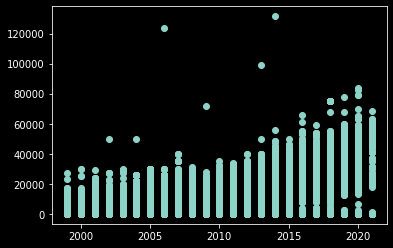

In [29]:

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state = 22)
plt.scatter(X_train["year"], y_train)
auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('linear', LinearRegression())])
auto_pipe.fit(X_train, y_train)
linear_coefs = auto_pipe.named_steps['linear'].coef_
# Answer check
print(type(linear_coefs))
print(linear_coefs)
auto_pipe

train_predict=auto_pipe.predict(X_train)
train_predict[train_predict < 0] = 0
train_mse=mean_squared_error(train_predict, y_train)

test_predict=auto_pipe.predict(X_test)
test_predict[test_predict < 0] = 0
test_mse=mean_squared_error(test_predict, y_test)

print(f"Linear Model: train_mse={train_mse}, test_mse={test_mse}")


In [30]:
#Noticed that linear model with any degree gives training MSE that is worse than test MSE. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [31]:
#We will provide the LInear regression model to estimate the price of a used car based on its year and odometer reading. We provided a model for Toyota for now but the same 
#approach can be used to estimate price for any other car manufactures but picking up the appropriate model
#Here is the model for Toyota used cars:

auto_pipe
print(auto_pipe.named_steps['linear'].coef_)


[-1370225.03406808  1377503.69861275]
